In [1]:
%matplotlib ipympl

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [2]:
pore_radius = np.array([2.5,5.0,10.0])
minlen = int(2*pore_radius.sum() + 2*pore_radius.size)
image_size = np.array([minlen,minlen,minlen])
center_axis = minlen//2
pore_centers = []
for i,r in enumerate(pore_radius):
    pc = 2*pore_radius[:i].sum() + 2*pore_radius[:i].size + r + 1
    nc = np.array([center_axis, center_axis, pc])
    pore_centers.append(nc)
pore_centers

[array([20. , 20. ,  3.5]), array([20., 20., 13.]), array([20., 20., 30.])]

In [3]:
image_data = 127*np.ones(image_size, dtype='uint8')

In [4]:
for z in range(image_size[0]):
    print(f"current slice ({z+1}/{image_size[0]})",end='\r')
    for y in range(image_size[1]):
        for x in range(image_size[0]):
            coords = np.array([z+0.5, y+0.5, x+0.5])
            for i,c in enumerate(pore_centers):
                if(np.linalg.norm(coords-c) < pore_radius[i]):
                    image_data[z,y,x] = 0


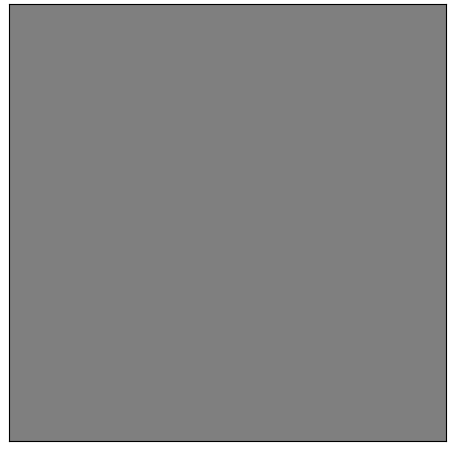

In [5]:
# If fig was created, replace it 
try:
   plt.close(fig)
except:
    pass

fig, axs = plt.subplots(1,1, figsize=(4.5,4.5), constrained_layout=True)
axs.set_xticks([])
axs.set_yticks([])
axs.imshow(image_data[0], cmap='gray', vmin=0, vmax=255)

def update_slider(change):
    axs.imshow(image_data[change.new], cmap='gray', vmin=0, vmax=255)
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=0,
    min=0, max=image_data.shape[0]-1, step=1,
    description='slice',
    continuous_update=False
)
int_slider.observe(update_slider, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [27]:
plt.close('all')

In [ ]:
name = f"{pore_radius.size}spheres"
for r in pore_radius:
    name += f"_r={r}voxels"
imgdir = f"imgs/{name}"

try:
    os.mkdir(imgdir)
except:
    pass

for i,img in enumerate(image_data):
    fname = os.path.join(imgdir,f"{name}_{i:03}.png")    
    plt.imsave(fname, img, format='png', cmap='gray', vmin=0, vmax=255)

In [28]:
image_data[center_axis-1:center_axis+1, 
           center_axis-1:center_axis+1, 
           int(pore_centers[0][2]):int(pore_centers[-1][2])] = 0

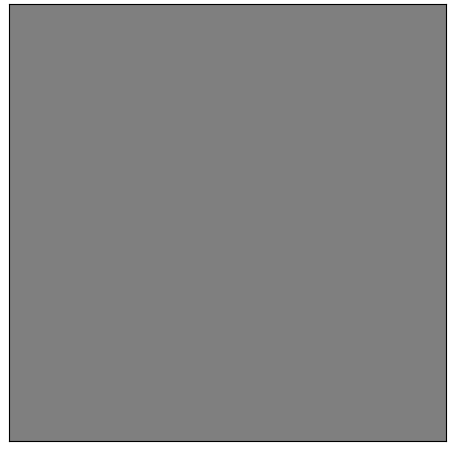

In [29]:
# If fig was created, replace it 
try:
   plt.close(fig)
except:
    pass

fig, axs = plt.subplots(1,1, figsize=(4.5,4.5), constrained_layout=True)
axs.set_xticks([])
axs.set_yticks([])
axs.imshow(image_data[0], cmap='gray', vmin=0, vmax=255)

def update_slider(change):
    axs.imshow(image_data[change.new], cmap='gray', vmin=0, vmax=255)
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=0,
    min=0, max=image_data.shape[0]-1, step=1,
    description='slice',
    continuous_update=False
)
int_slider.observe(update_slider, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [30]:
plt.close('all')

In [31]:
name = f"{pore_radius.size}connectedSpheres"
for r in pore_radius:
    name += f"_r={r}voxels"
imgdir = f"imgs/{name}"

try:
    os.mkdir(imgdir)
except:
    pass

for i,img in enumerate(image_data):
    fname = os.path.join(imgdir,f"{name}_{i:03}.png")    
    plt.imsave(fname, img, format='png', cmap='gray', vmin=0, vmax=255)